In [22]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import matplotlib.pyplot as plt
import math
import os
from PIL import Image

def image_grid_plt(imgs, cols):

    rows = math.ceil(len(imgs) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

    axes = axes.flatten()

    for i, img in enumerate(imgs):
        ax = axes[i]
        ax.imshow(img)
        ax.axis('off')

    for i in range(len(imgs), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()

    plt.show()

In [25]:
image_folder = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/imaget"

In [26]:
images = []
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(image_folder, filename)
        images.append(Image.open(img_path))
if images:
    grid = image_grid_plt(images, cols=3)
    display(grid)
else:
    print("No images found in the directory.")

Output hidden; open in https://colab.research.google.com to view.

In [27]:
classes = ['ronaldo', 'messi', 'mahrez']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)

In [28]:
logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[20.8258, 19.6760, 19.8024],
        [28.6438, 22.2123, 19.3071],
        [27.8254, 22.1686, 22.7428],
        [28.6450, 24.5553, 25.0782],
        [26.4111, 24.5252, 20.0351],
        [23.4804, 28.0843, 15.7373],
        [25.0605, 31.5965, 20.3462],
        [26.4776, 27.9184, 14.9227],
        [22.2226, 25.9436, 20.0358],
        [26.4036, 26.9486, 11.4936],
        [23.6908, 23.4122, 27.7046],
        [21.3104, 19.9972, 30.4707],
        [23.4804, 19.9261, 30.1965],
        [21.8450, 21.3040, 31.6934],
        [26.9093, 24.8414, 30.9253]], grad_fn=<TBackward0>)

In [29]:
probs = logits_per_image.softmax(dim=1)
probs

tensor([[5.9664e-01, 1.8895e-01, 2.1441e-01],
        [9.9830e-01, 1.6074e-03, 8.7978e-05],
        [9.9040e-01, 3.4601e-03, 6.1436e-03],
        [9.5695e-01, 1.6024e-02, 2.7029e-02],
        [8.6701e-01, 1.3152e-01, 1.4755e-03],
        [9.9129e-03, 9.9008e-01, 4.2994e-06],
        [1.4481e-03, 9.9854e-01, 1.2984e-05],
        [1.9142e-01, 8.0858e-01, 1.8355e-06],
        [2.3574e-02, 9.7378e-01, 2.6468e-03],
        [3.6703e-01, 6.3297e-01, 1.2285e-07],
        [1.7509e-02, 1.3252e-02, 9.6924e-01],
        [1.0512e-04, 2.8274e-05, 9.9987e-01],
        [1.2098e-03, 3.4599e-05, 9.9876e-01],
        [5.2827e-05, 3.0754e-05, 9.9992e-01],
        [1.7667e-02, 2.2340e-03, 9.8010e-01]], grad_fn=<SoftmaxBackward0>)

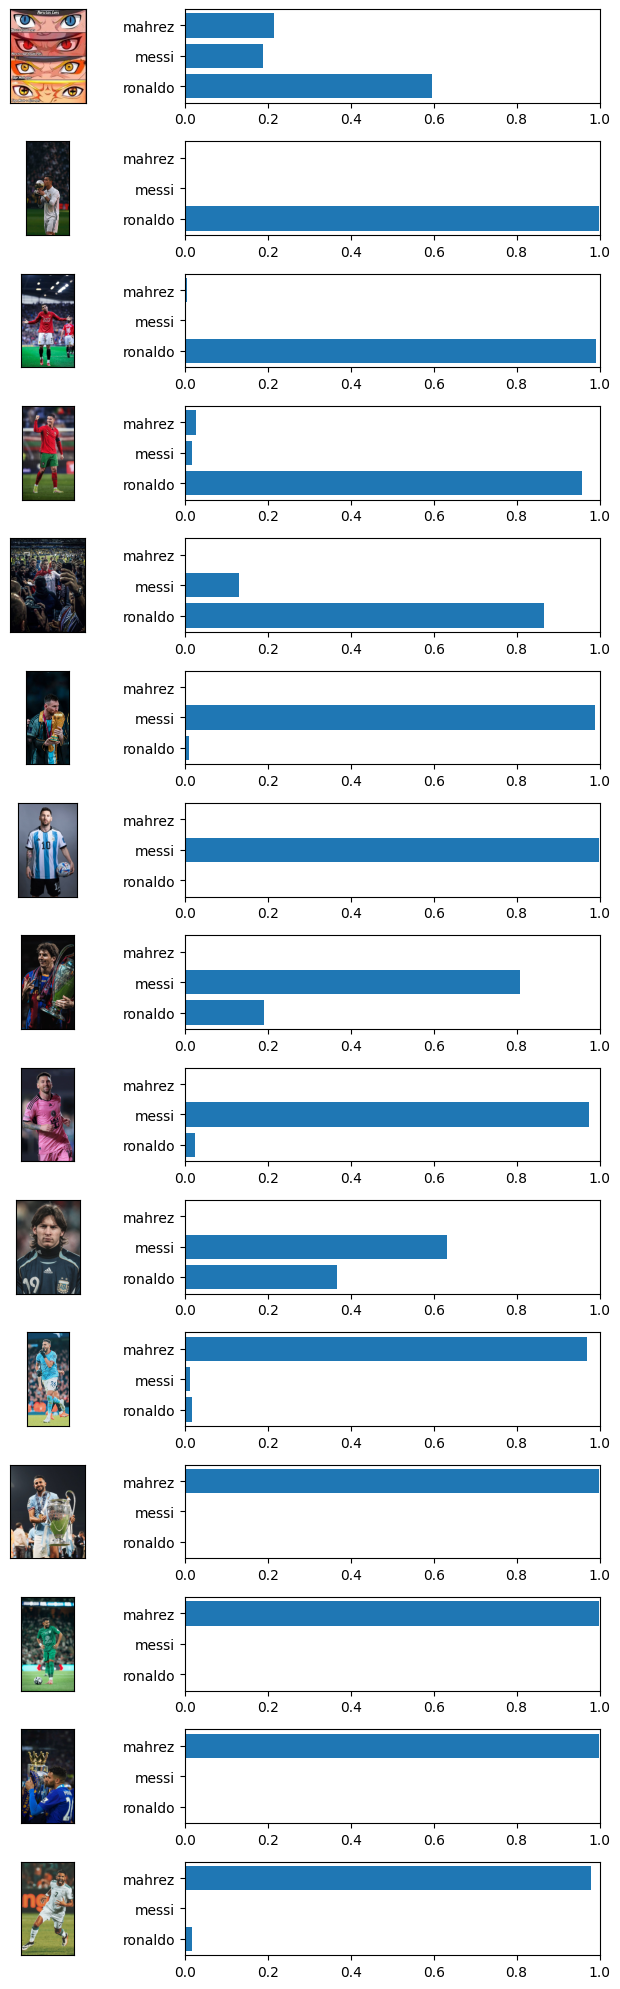

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    # show original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

  # show probabilities
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)
    plt.tight_layout()
plt.show()

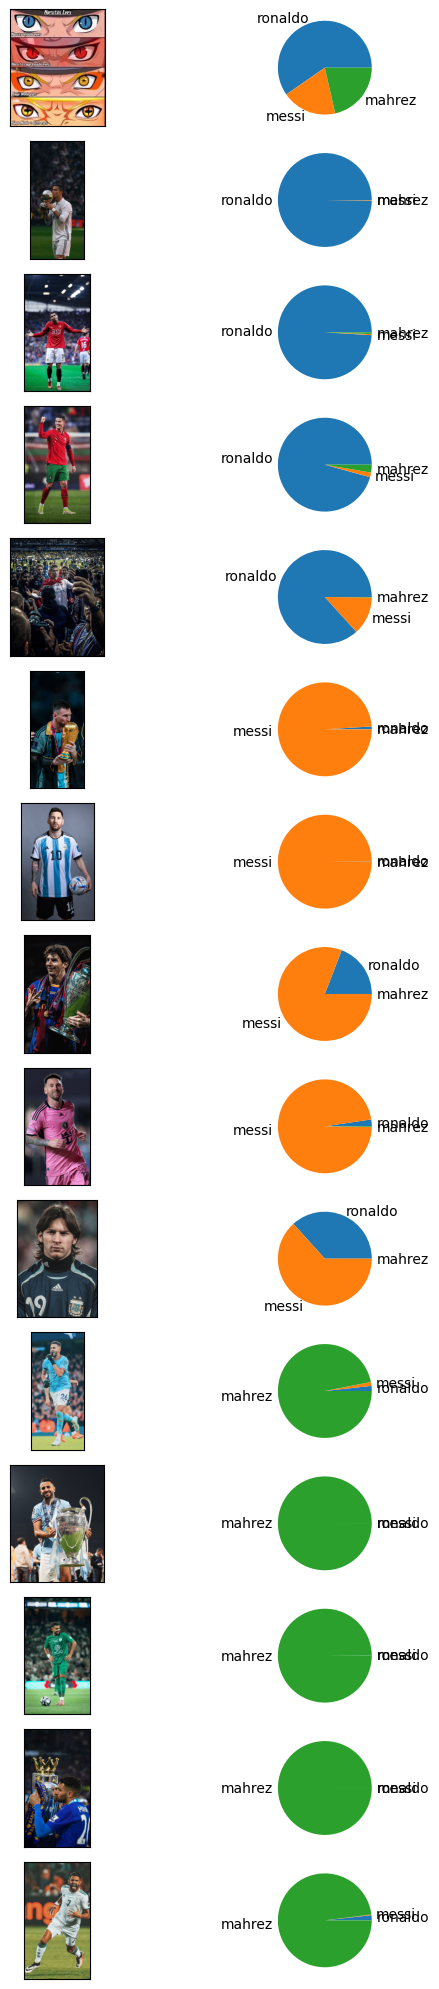

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(len(images), 2, 2*(idx+1))

    plt.pie(probs[idx].detach().numpy(), labels=classes)
    plt.xlim(0,1.0)
    plt.tight_layout()
plt.show()

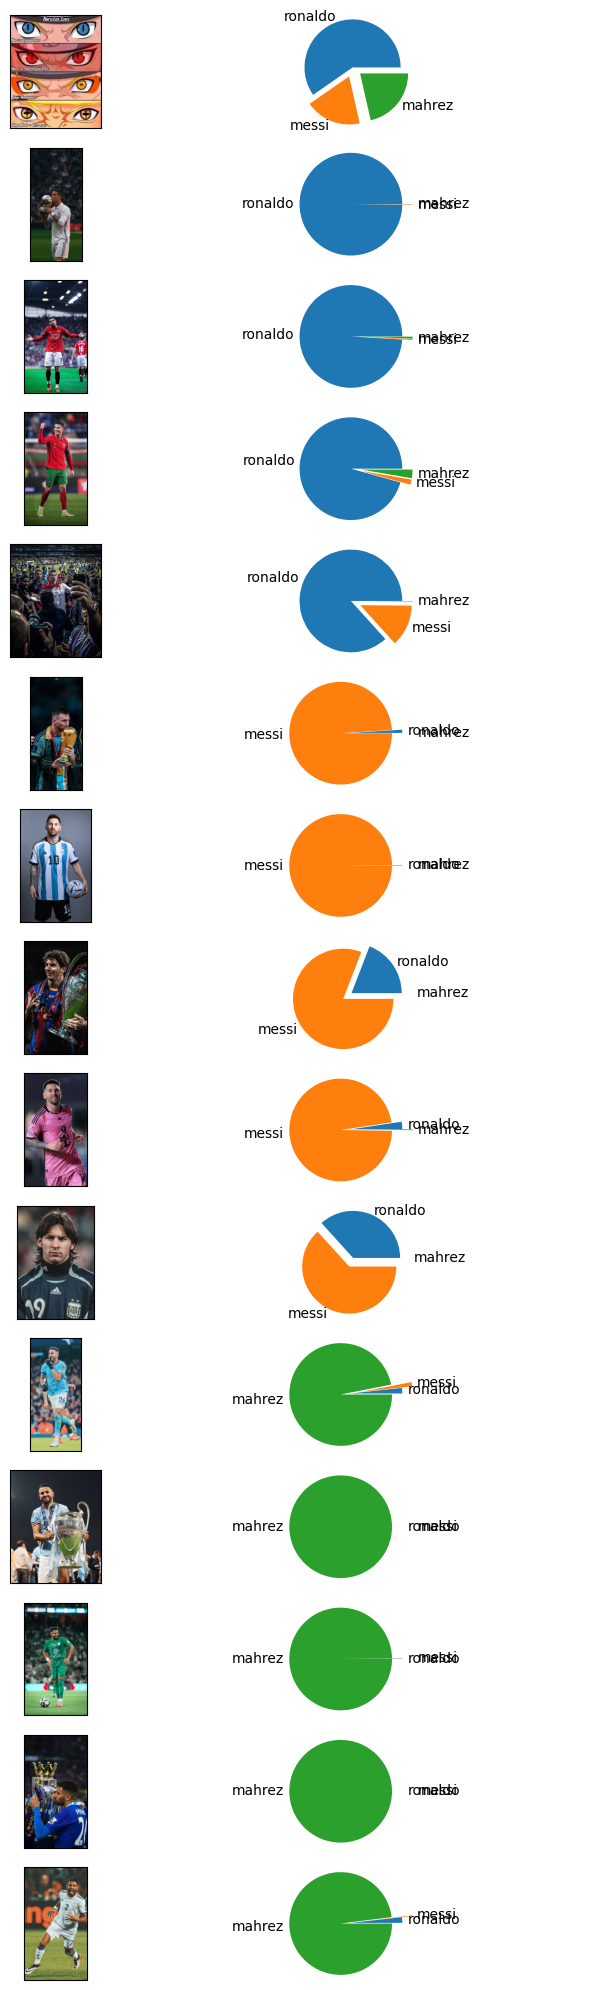

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(len(images), 2, 2*(idx+1))

    explode_tuple = (0, 0.2, 0.2)

    plt.pie(probs[idx].detach().numpy(), labels=classes, explode=explode_tuple)
    plt.axis('equal')
    plt.xlim(0,1.0)
    plt.tight_layout()
plt.show()